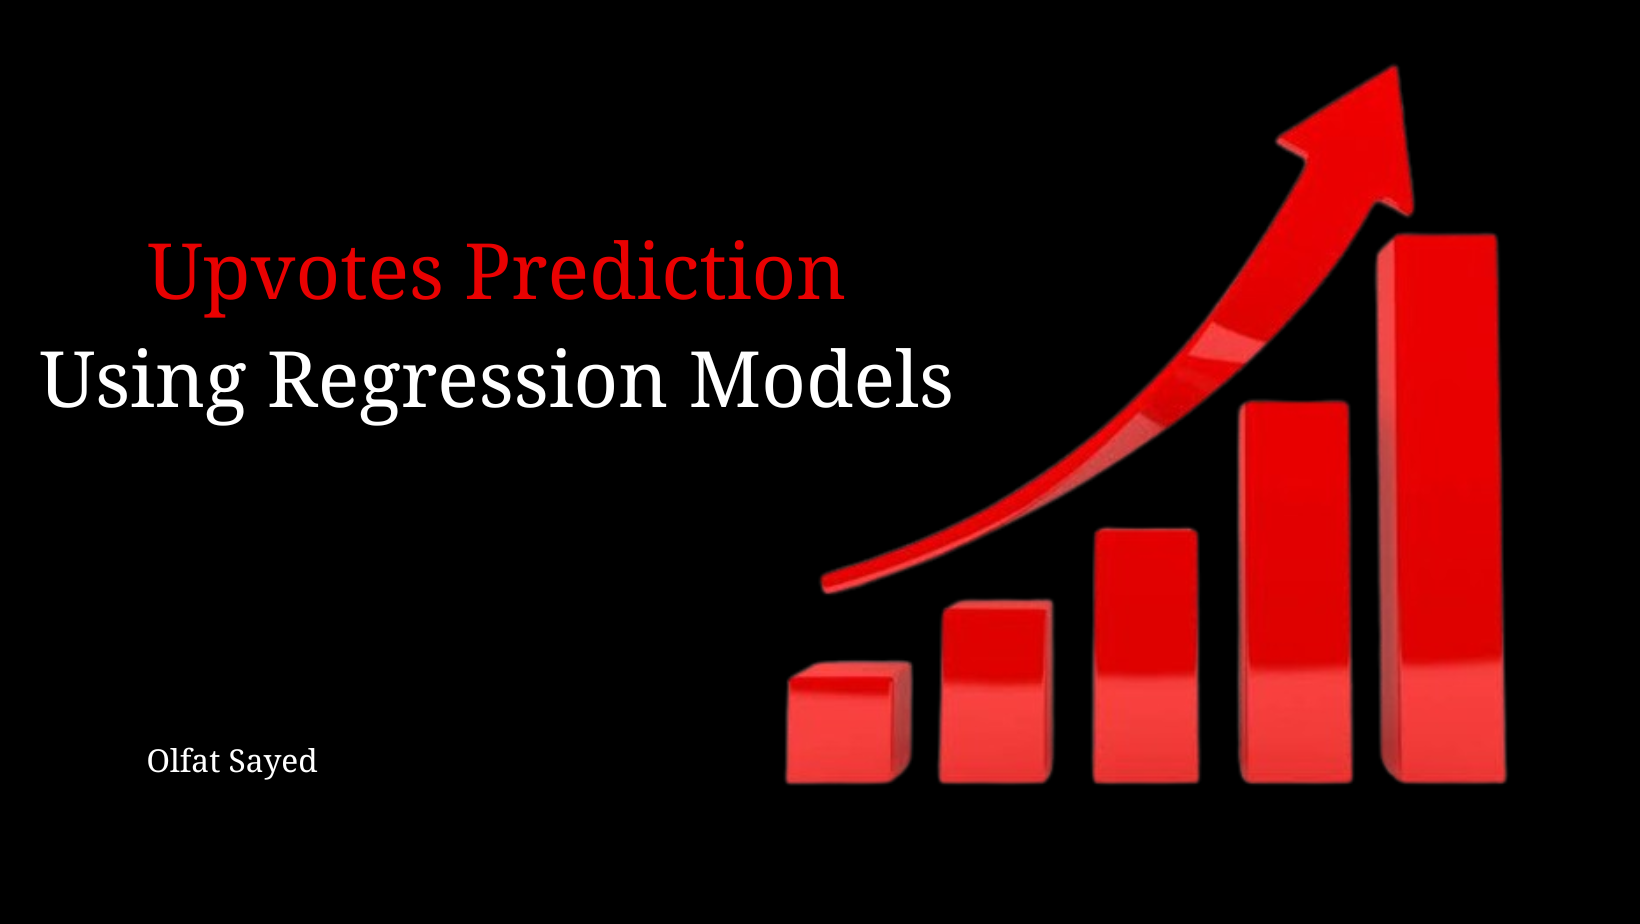

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib as plt
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error

# Read the data

In [3]:
train_df=pd.read_csv("../input/predict-the-number-of-upvotes-a-post-will-get/train_NIR5Yl1.csv")
test_df=pd.read_csv("../input/predict-the-number-of-upvotes-a-post-will-get/test_8i3B3FC.csv")

In [4]:
train_df.copy()

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
...,...,...,...,...,...,...,...
330040,339800,c,36.0,2.0,84919,1063.0,0.0
330041,253800,c,1649.0,2.0,76730,23319.0,73.0
330042,210756,c,6178.0,2.0,91701,2453.0,15.0
330043,56089,j,89.0,2.0,80245,2107.0,3.0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330045 entries, 0 to 330044
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   ID          330045 non-null  int64  
 1   Tag         330045 non-null  object 
 2   Reputation  330045 non-null  float64
 3   Answers     330045 non-null  float64
 4   Username    330045 non-null  int64  
 5   Views       330045 non-null  float64
 6   Upvotes     330045 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 17.6+ MB


In [6]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,330045.0,235748.682789,136039.418471,1.0,117909.0,235699.0,353620.0,471493.0
Reputation,330045.0,7773.146798,27061.412587,0.0,282.0,1236.0,5118.0,1042428.0
Answers,330045.0,3.917672,3.579515,0.0,2.0,3.0,5.0,76.0
Username,330045.0,81442.888803,49215.100730,0.0,39808.0,79010.0,122559.0,175738.0
Views,330045.0,29645.071342,80956.456478,9.0,2594.0,8954.0,26870.0,5231058.0
Upvotes,330045.0,337.505358,3592.441135,0.0,8.0,28.0,107.0,615278.0


In [7]:
train_df.head(20)

,ID,Tag,Reputation,Answers,Username,Views,Upvotes
0,52664,a,3942.0,2.0,155623,7855.0,42.0
1,327662,a,26046.0,12.0,21781,55801.0,1175.0
2,468453,c,1358.0,4.0,56177,8067.0,60.0
3,96996,a,264.0,3.0,168793,27064.0,9.0
4,131465,c,4271.0,4.0,112223,13986.0,83.0
5,345568,r,440.0,1.0,23866,5577.0,4.0
6,376865,c,147.0,1.0,10759,17184.0,17.0
7,467378,j,2269.0,2.0,54623,312.0,3.0
8,393640,j,111.0,2.0,172926,53738.0,79.0
9,130054,c,2749.0,1.0,10189,227.0,0.0


In [8]:
train_df.shape,test_df.shape

((330045, 7), (141448, 6))

In [9]:
test_df.head(20)

,ID,Tag,Reputation,Answers,Username,Views
0,366953,a,5645.0,3.0,50652,33200.0
1,71864,c,24511.0,6.0,37685,2730.0
2,141692,i,927.0,1.0,135293,21167.0
3,316833,i,21.0,6.0,166998,18528.0
4,440445,i,4475.0,10.0,53504,57240.0
5,3514,c,3252.0,1.0,115109,2307.0
6,331420,x,859.0,1.0,88355,6507.0
7,406540,c,770.0,4.0,74489,57775.0
8,227379,s,8727.0,2.0,37904,4459.0
9,331687,p,170.0,4.0,162810,4899.0


In [10]:
train_df.isnull().sum()

ID            0
Tag           0
Reputation    0
Answers       0
Username      0
Views         0
Upvotes       0
dtype: int64

In [11]:
train_df.duplicated().sum()


0

In [12]:
train_df.value_counts()

ID      Tag  Reputation  Answers  Username  Views     Upvotes
1       j    5518.0      7.0      112420    9792.0    34.0       1
314399  x    665.0       0.0      41352     244.0     10.0       1
314362  c    144322.0    2.0      79079     1540.0    222.0      1
314361  h    4825.0      1.0      62142     8299.0    97.0       1
314360  c    58.0        5.0      40693     6322.0    0.0        1
                                                                ..
157212  p    2073.0      3.0      59179     31920.0   82.0       1
157209  c    56.0        16.0     56688     158375.0  38.0       1
157207  c    37620.0     4.0      78813     7231.0    212.0      1
157206  j    231.0       3.0      151644    25878.0   22.0       1
471493  a    8430.0      1.0      9444      4691.0    28.0       1
Name: count, Length: 330045, dtype: int64

# Find a correlation

<Axes: >

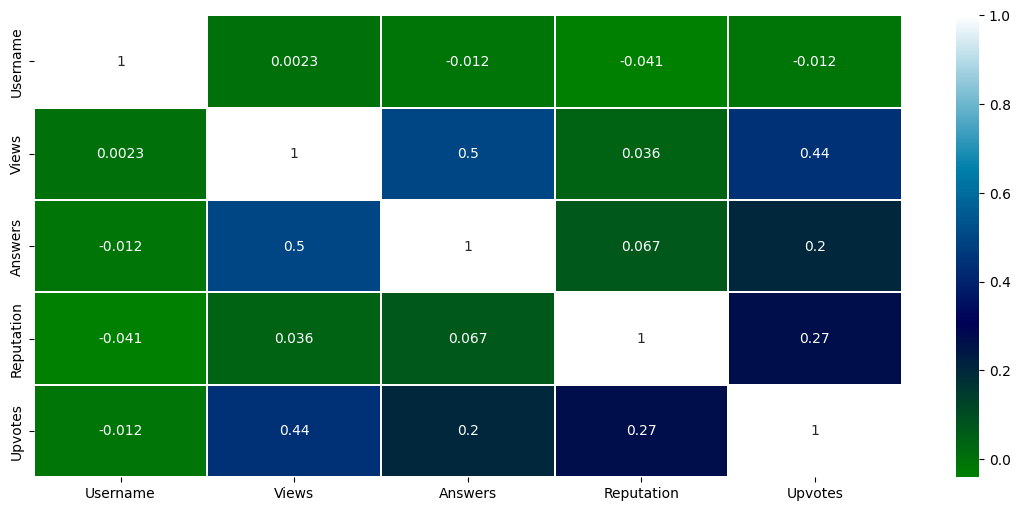

In [13]:
plt.figure(figsize=(14,6))
df=['Username','Views','Answers','Reputation','Upvotes']
data=train_df[df].corr()
sns.heatmap(data,xticklabels=data.columns,yticklabels=data.columns,linewidths=.1,annot=True,cmap='ocean')

In [14]:


#sns.kdeplot(train_df['Views'].sample(100),shade=True,color='g')

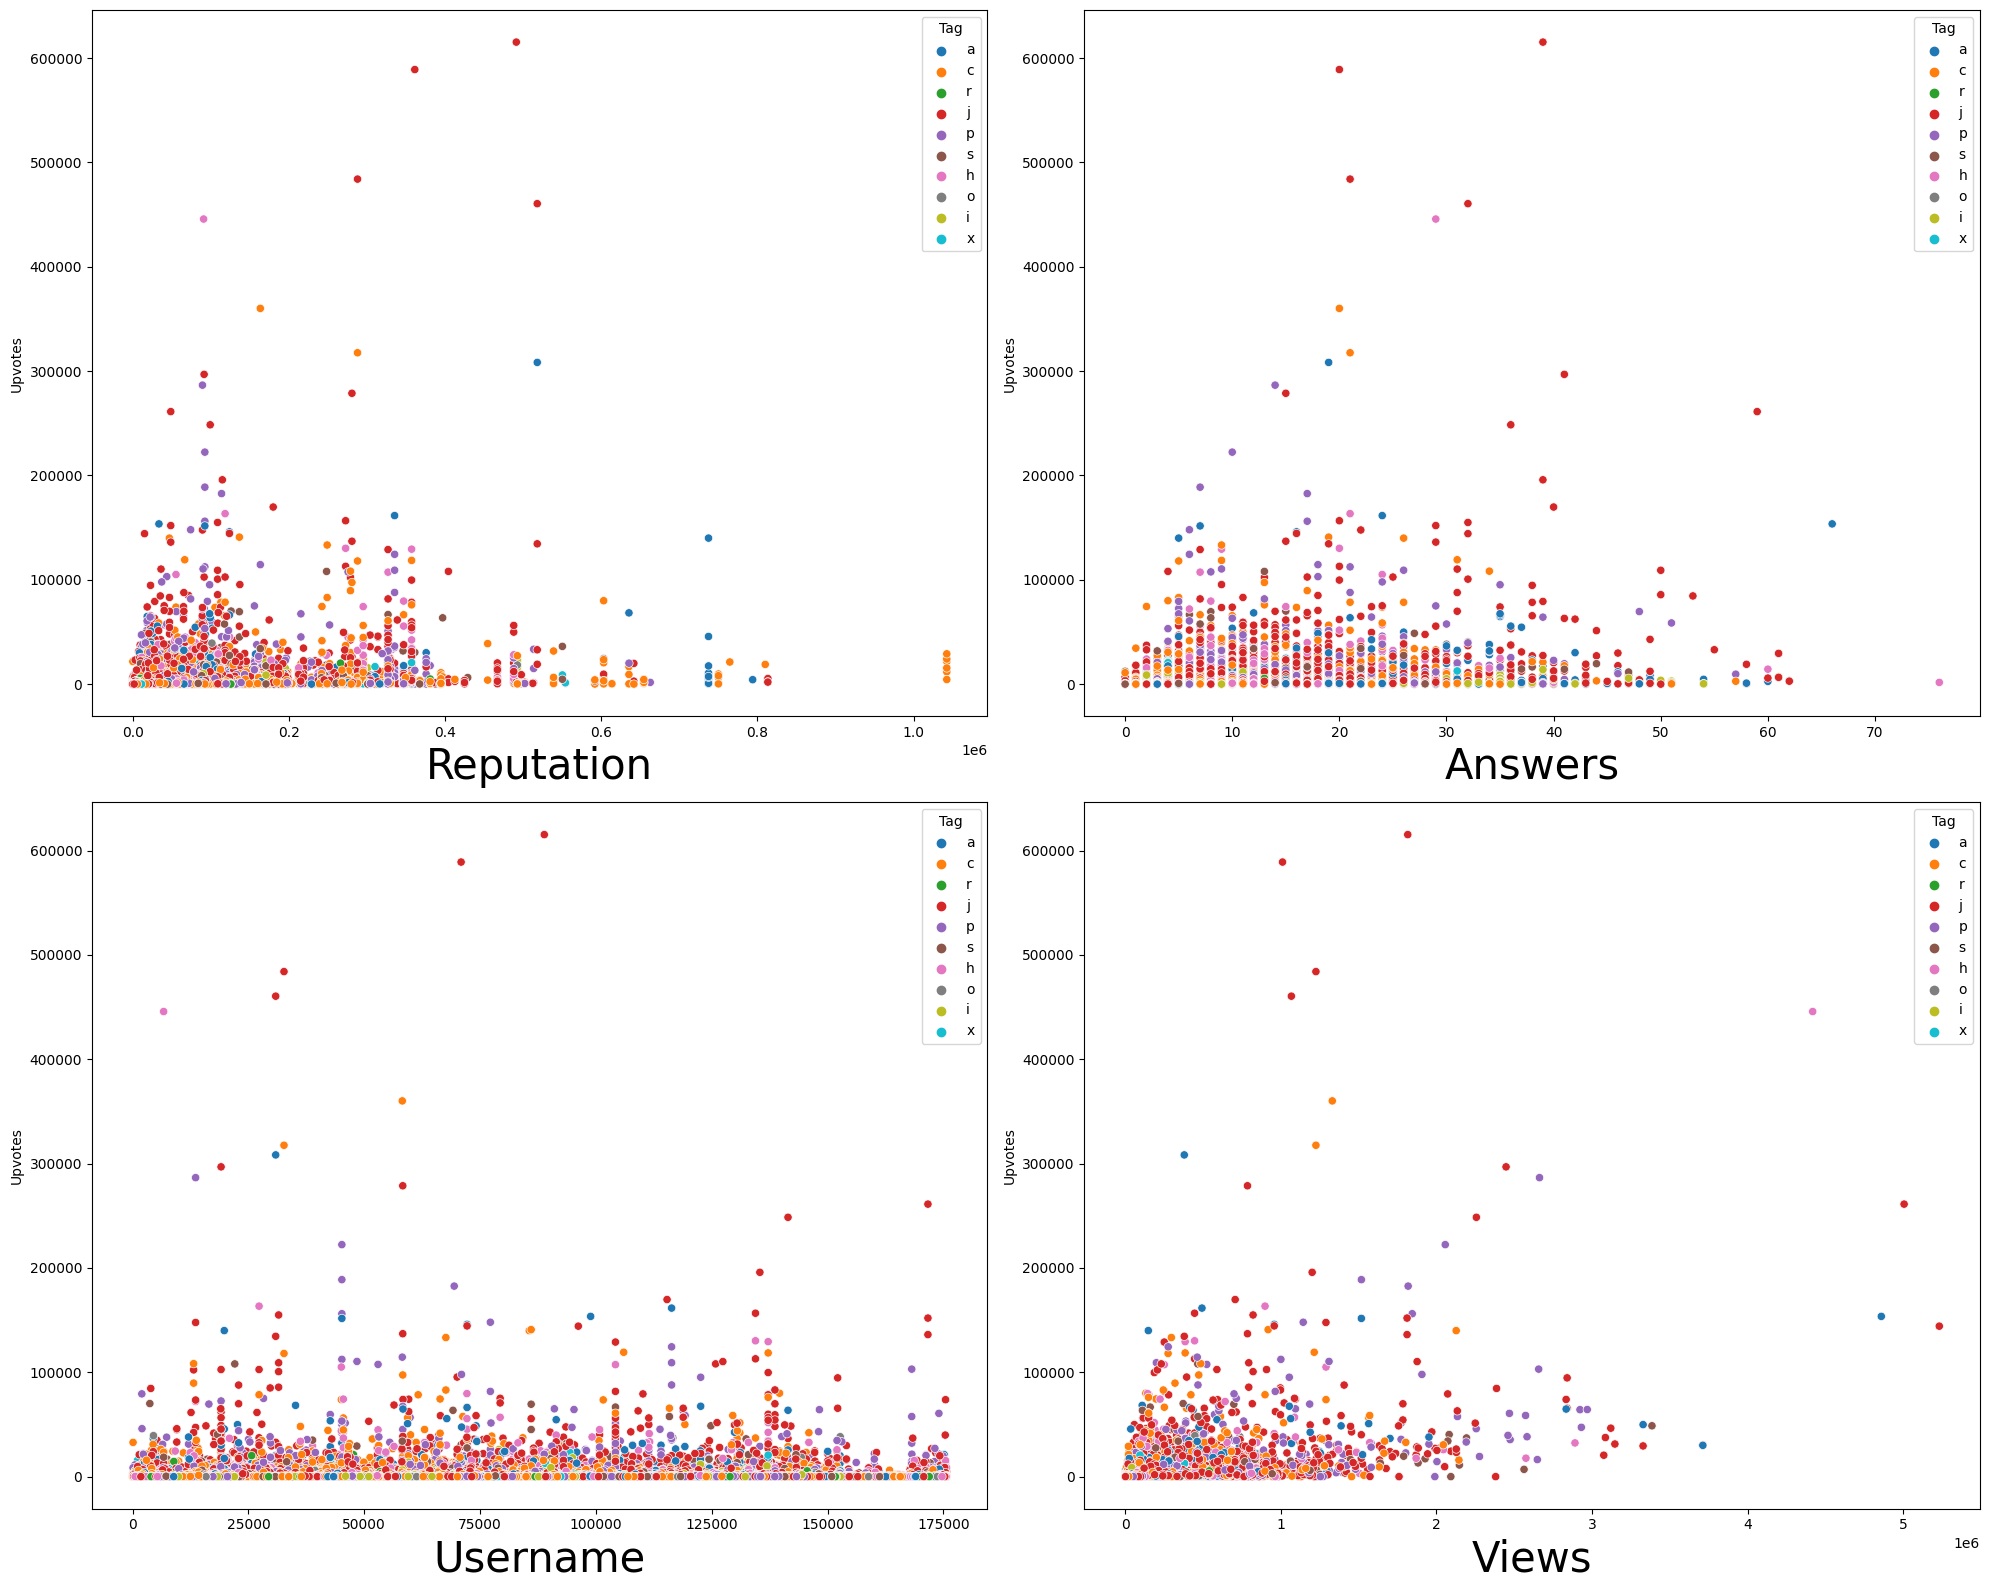

In [15]:
count=1
plt.figure(figsize = (20,16))
for column in train_df.drop(['Upvotes','Tag','ID'],axis=1):
    if count <= 50:
        ax = plt.subplot(2, 2, count)
        sns.scatterplot(x=column,y='Upvotes',data=train_df,hue='Tag')
        plt.xlabel(column, fontsize =30)
    count+=1
plt.tight_layout()
plt.show()

plt.figure(figsize=(50,20))
c=1

for i in range(1,25,2):
    
    if c==20:
        ax = plt.subplot(2, 2, c)
        sns.jointplot(data=train_df,x=c,y='Upvotes',kind='kde',cmap='winter')
    c+=1
plt.tight_layout()
plt.show()

/tmp/ipykernel_42/850409918.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df[column],color='m')
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/tmp/ipykernel_42/850409918.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms)

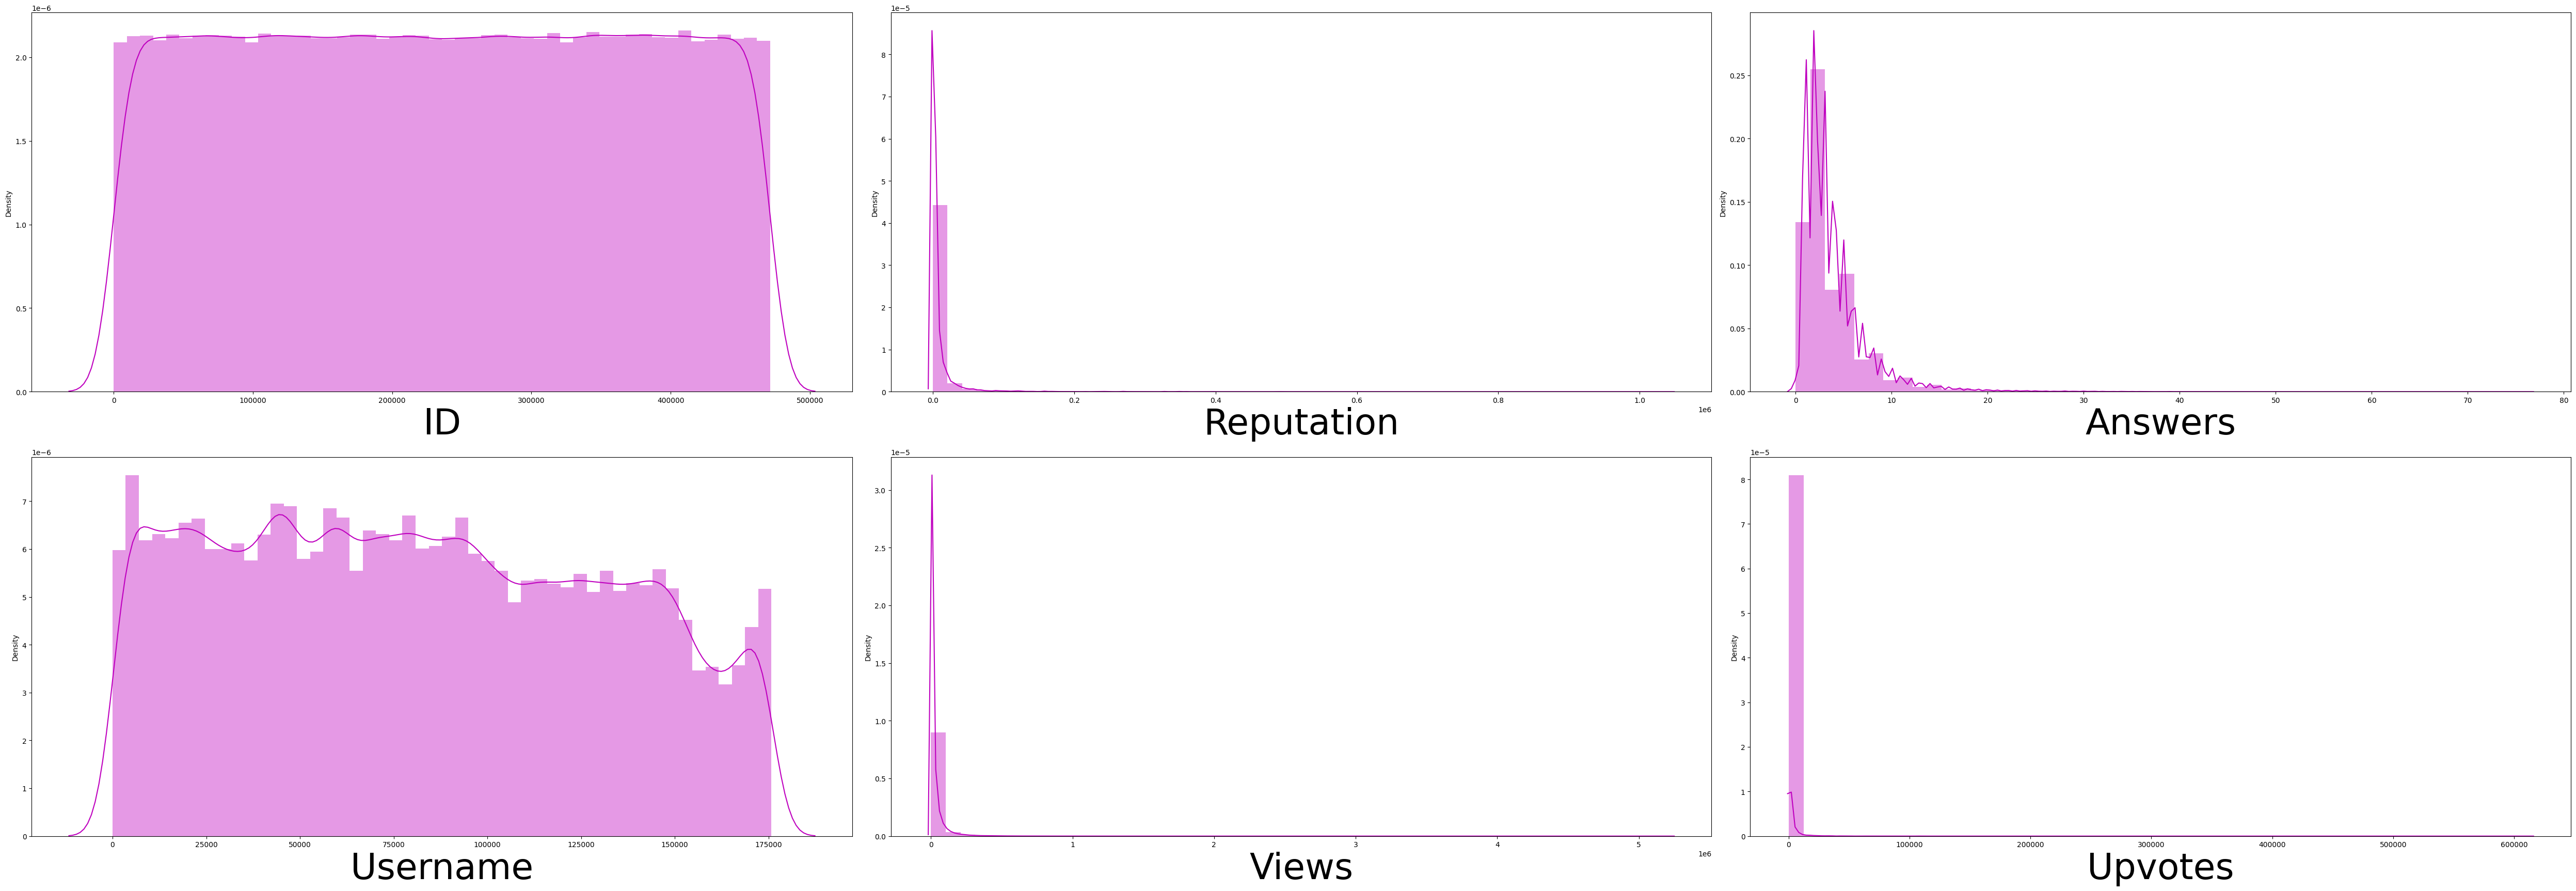

In [16]:
# Let's see how data is distributed for every column

plt.figure(figsize = (50,25))
count = 1

for column in train_df.drop('Tag',axis=1):
    if count <= 200:
        ax = plt.subplot(3, 3, count)
        sns.distplot(train_df[column],color='m')
        plt.xlabel(column, fontsize = 50)
        
    count+= 1
    
plt.tight_layout()
plt.show()

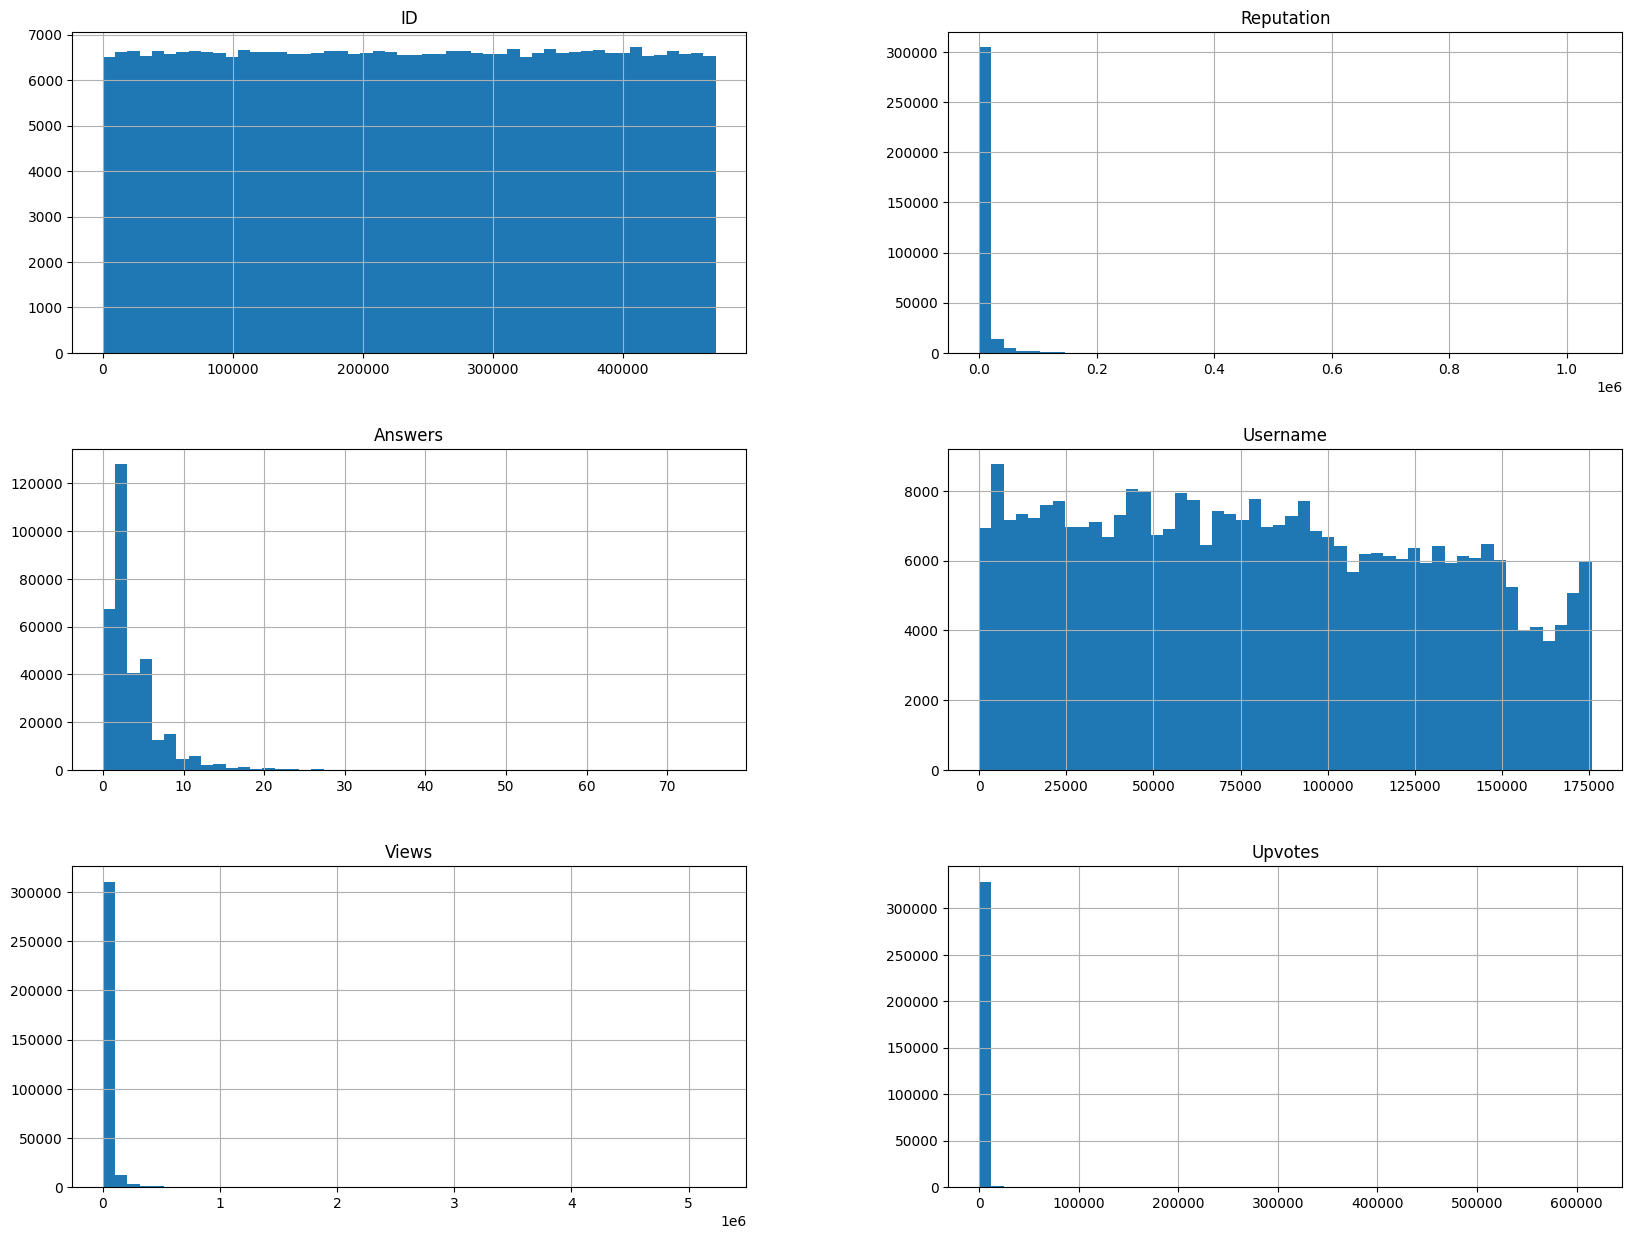

In [17]:
train_df.hist(bins=50, figsize=(20, 15))
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

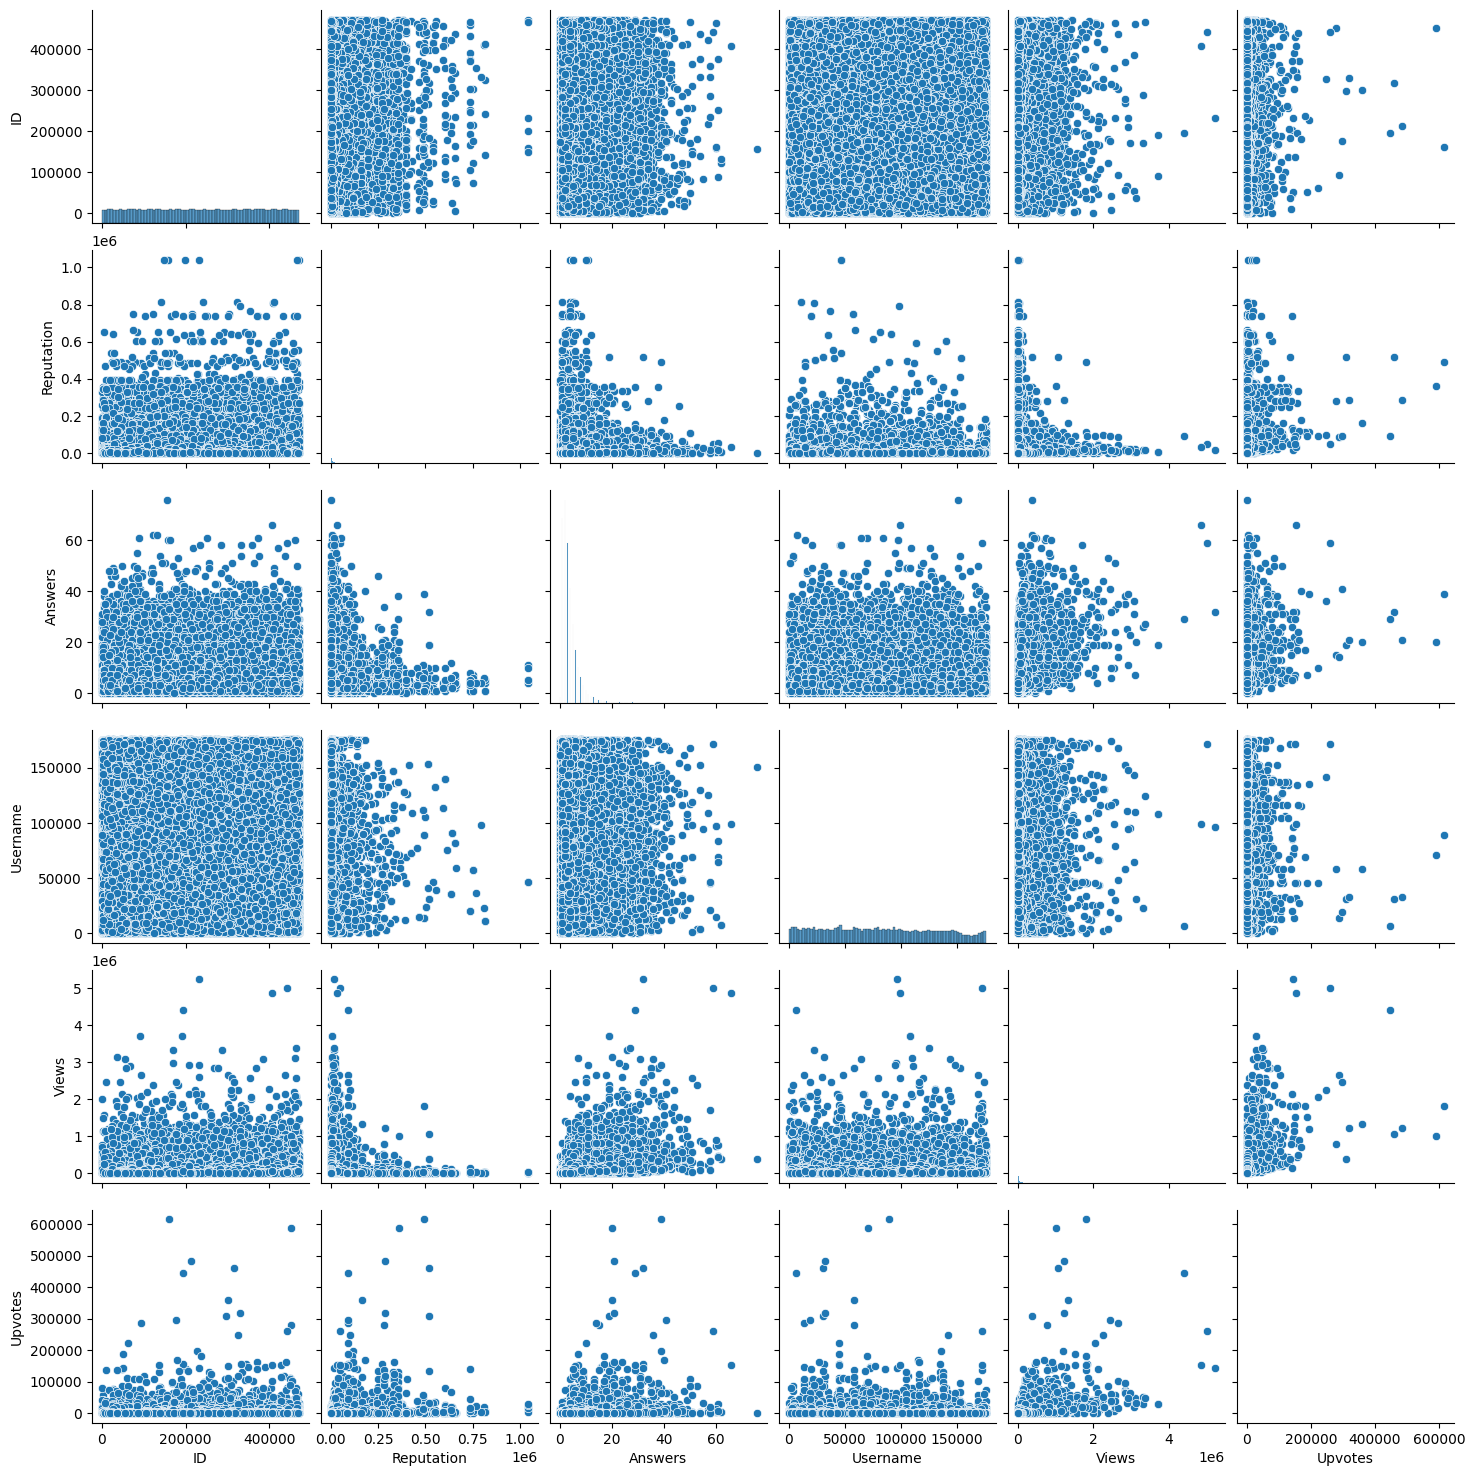

In [18]:
sns.pairplot(train_df,kind="scatter")

In [19]:
train_df.drop(['ID','Username'],axis=1,inplace=True)

In [20]:
#train_df=pd.concat([train_df,df],axis=1)

In [21]:
X=train_df.drop("Upvotes",axis=1)
y=train_df['Upvotes']


## Spilt Data

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=44,shuffle=True)

## Encoding

In [23]:
oh=OneHotEncoder(drop='first',handle_unknown='ignore')

ms,ss=MinMaxScaler(),StandardScaler()


ct=ColumnTransformer([
    ('cat_encoder',oh,make_column_selector(dtype_include='object')),
    ('num_encoder',ss,make_column_selector(dtype_include='float64'))
],remainder='passthrough',n_jobs=-1)
ct

ColumnTransformer(n_jobs=-1, remainder='passthrough',
                  transformers=[('cat_encoder',
                                 OneHotEncoder(drop='first',
                                               handle_unknown='ignore'),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ccd7fda7df0>),
                                ('num_encoder', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7ccd8a0975e0>)])

In [24]:
X_train=ct.fit_transform(X_train)

X_test=ct.transform(X_test)


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


for col in train_df.drop('Tag',axis=1,inplace=True):
    plt.figure()
    sns.barplot(x=col,y="Upvotes",data=train_df)
plt.show()

## Polynomial Features

In [25]:
poly_X_train=PolynomialFeatures(degree=4).fit_transform(X_train)
lr_model=LinearRegression().fit(poly_X_train,y_train)

In [26]:
poly_X_test=PolynomialFeatures(degree=4).fit_transform(X_test)

In [27]:
y_pred_train=lr_model.predict(poly_X_train)
y_pred_test=lr_model.predict(poly_X_test)

In [28]:
lr_model.score(poly_X_train,y_train)


0.9474765463935432

In [29]:
lr_model.score(poly_X_test,y_test)


0.8803731424616648

In [30]:
X_train_percentage = len(X_train)/(len(train_df)) 

X_test_percentage = len(X_test)/(len(train_df)) 

print("\ntrain \t\t%:", 100*X_train_percentage, "\ntest \t\t%:", 100*X_test_percentage)


train 		%: 80.0 
test 		%: 20.0


In [31]:
mse=mean_squared_error(y_test,lr_model.predict(poly_X_test))
Mae=median_absolute_error(y_test,lr_model.predict(poly_X_test))


In [32]:
print(F"Mean Squared Error:{mse}")
print(F"Median Absolute Error:{Mae}")

Mean Squared Error:874109.2741953526
Median Absolute Error:24.53350241034059


# If you like my notebook,click the upvote button,please.🙂